In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv("austinCrime.csv")
df1 = pd.read_csv("crimesByZip.csv")


print(df.describe())
print(df1)
df1.info()

              year   total_crime
count   142.000000    142.000000
mean   2015.070423    821.654930
std       0.830687   2112.263094
min    2014.000000      1.000000
25%    2014.000000     11.000000
50%    2015.000000     98.000000
75%    2016.000000    447.250000
max    2016.000000  11040.000000
     year  zipcode  total_crime  year_str
0    2014    78731          527      2014
1    2015    78731          566      2015
2    2016    78731          512      2016
3    2014    78751          926      2014
4    2015    78751          927      2015
..    ...      ...          ...       ...
137  2016    78613          341      2016
138  2014    78613          404      2014
139  2016    78664            2      2016
140  2015    78719          186      2015
141  2016    78719          165      2016

[142 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       -------------

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   year         142 non-null    int64
 1   zipcode      142 non-null    int64
 2   total_crime  142 non-null    int64
 3   year_str     142 non-null    int64
dtypes: int64(4)
memory usage: 4.6 KB


In [25]:
print(df.head())
df.info()


   year                     description  total_crime    CrimeGroup
0  2014  AGG ROBBERY/DEADLY WEAPON               405       ASSAULT
1  2014  BURGLARY NON RESIDENCE                 1424      BURGLARY
2  2014  BURGLARY OF RESIDENCE                  3980      BURGLARY
3  2014  AUTO THEFT                             2188         THEFT
4  2014  RAPE                                    365  Other Crimes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         142 non-null    int64 
 1   description  142 non-null    object
 2   total_crime  142 non-null    int64 
 3   CrimeGroup   142 non-null    object
dtypes: int64(2), object(2)
memory usage: 4.6+ KB


<Axes: xlabel='year,CrimeGroup'>

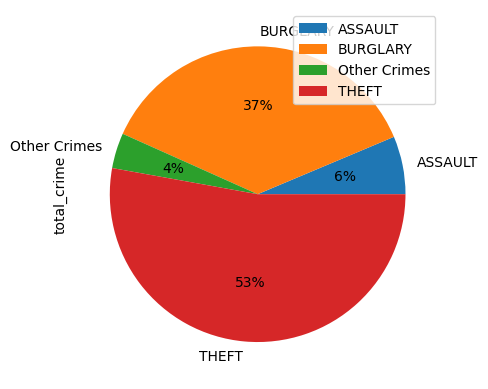

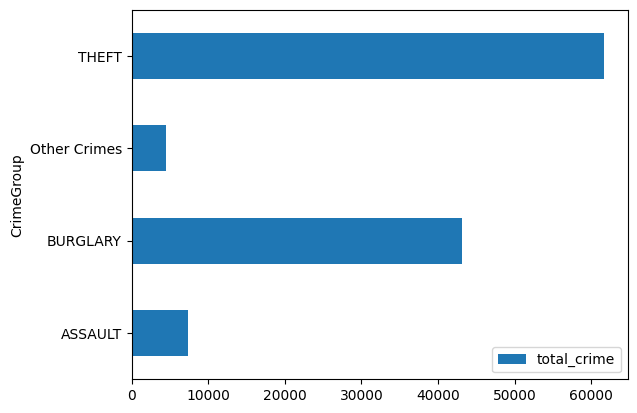

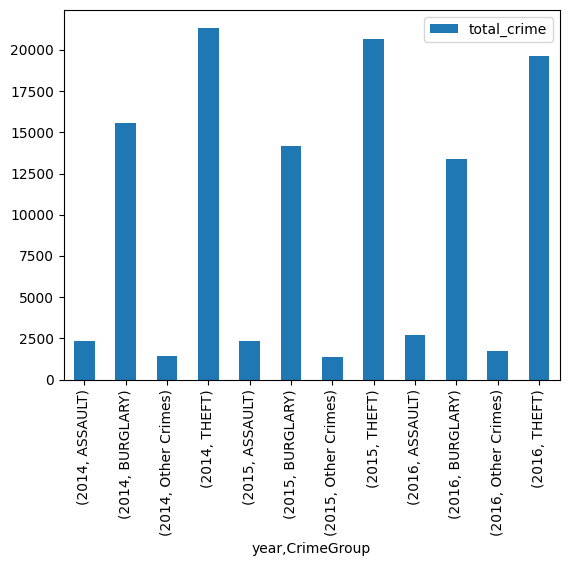

In [26]:

df.groupby(['CrimeGroup']).sum().plot(kind='pie', y='total_crime',autopct='%1.0f%%')
df.groupby(['CrimeGroup']).sum().plot(kind='barh', y='total_crime')
df.groupby(['year','CrimeGroup']).sum().plot(kind='bar', y=['total_crime'])


In [27]:
df.groupby(['year', 'CrimeGroup']).sum().reset_index()

,year,CrimeGroup,description,total_crime
0,2014,ASSAULT,AGG ROBBERY/DEADLY WEAPON AGG ASSAULT ...,2320
1,2014,BURGLARY,BURGLARY NON RESIDENCE BURGLARY OF RESI...,15550
2,2014,Other Crimes,RAPE DEADLY CONDUCT ...,1418
3,2014,THEFT,AUTO THEFT THEFT BY SHOPLIF...,21353
4,2015,ASSAULT,AGG ROBBERY/DEADLY WEAPON AGG ASSAULT FAM/...,2360
5,2015,BURGLARY,BURGLARY OF VEHICLE BURGLARY NON RES...,14195
6,2015,Other Crimes,RAPE RAPE OF A CHILD ...,1347
7,2015,THEFT,THEFT THEFT OF HEAVY E...,20671
8,2016,ASSAULT,AGG RAPE OF A CHILD AGG ROBBERY/DEAD...,2719
9,2016,BURGLARY,BURGLARY OF VEHICLE BURGLARY NON RES...,13379


CrimeGroup  ASSAULT  BURGLARY  Other Crimes  THEFT
year                                              
2014           2320     15550          1418  21353
2015           2360     14195          1347  20671
2016           2719     13379          1745  19618


Text(0.5, 1.0, 'Crime Group Distribution Over the Years')

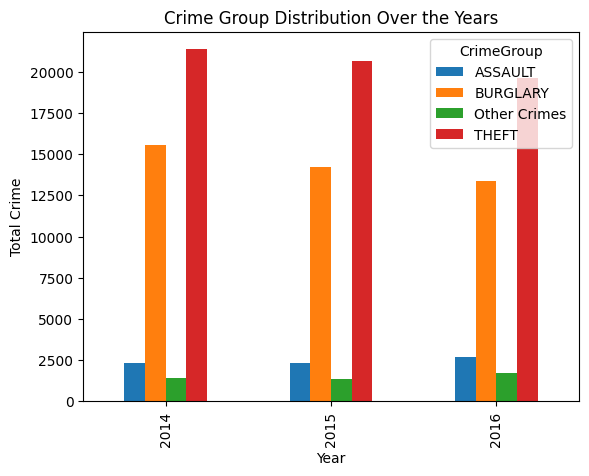

In [28]:
grouped_data = df.groupby(['year', 'CrimeGroup'])['total_crime'].sum().unstack() 
#unstack returns a dataframe with a new column label whose innermost level consist of pivoted inder labels

print(grouped_data)
grouped_data.plot(kind='bar')

plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.title('Crime Group Distribution Over the Years')

Text(0.5, 1.0, 'Crime Group Distribution Over the Years')

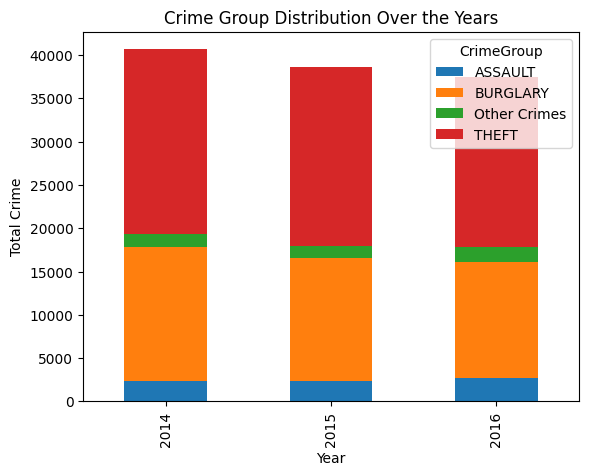

In [29]:
grouped_data = df.groupby(['year', 'CrimeGroup'])['total_crime'].sum().unstack()
grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.title('Crime Group Distribution Over the Years')



In [30]:
df.groupby(['year', 'CrimeGroup']).agg(totalCrimes=('total_crime','sum')).sort_values(['year', 'totalCrimes'], ascending=False).index.tolist()

[(2016, 'THEFT'),
 (2016, 'BURGLARY'),
 (2016, 'ASSAULT'),
 (2016, 'Other Crimes'),
 (2015, 'THEFT'),
 (2015, 'BURGLARY'),
 (2015, 'ASSAULT'),
 (2015, 'Other Crimes'),
 (2014, 'THEFT'),
 (2014, 'BURGLARY'),
 (2014, 'ASSAULT'),
 (2014, 'Other Crimes')]

Text(0.5, 1.0, 'Crime Group Distribution Over the Years')

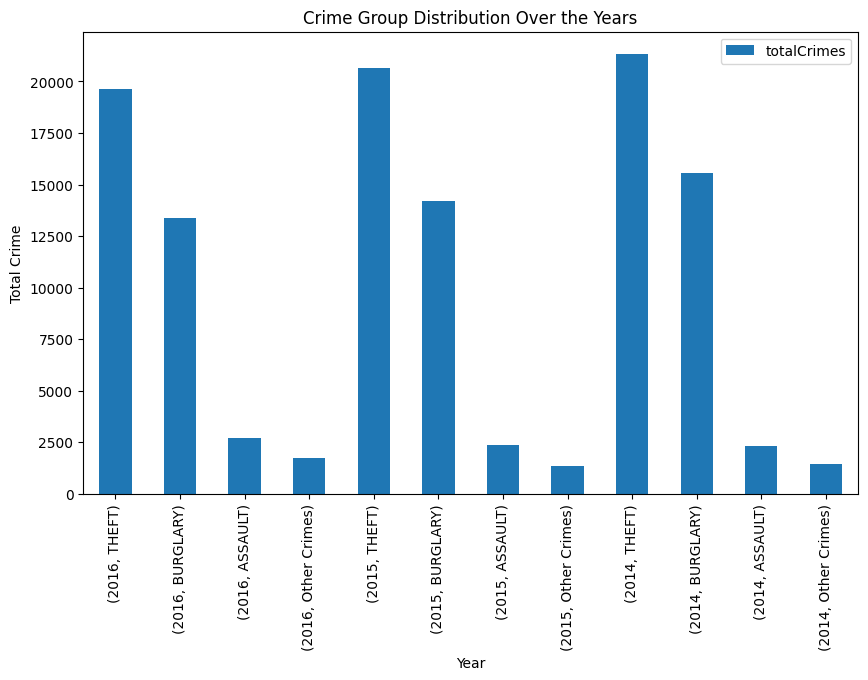

In [56]:
stacked_data=df.groupby(['year', 'CrimeGroup']).agg(totalCrimes=('total_crime','sum')).sort_values(['year', 'totalCrimes'], ascending=False)
stacked_data.plot(kind='bar', stacked=True,figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.title('Crime Group Distribution Over the Years')


In [43]:
grouped_data = df.groupby(['year', 'CrimeGroup'])['total_crime'].sum().unstack()

column_means = grouped_data.sum()
print(column_means)
sorted_columns = column_means.sort_values().index.to_list()
print(sorted_columns)
sorted_columns.reverse()
grouped_data = grouped_data[sorted_columns]
print(grouped_data)


CrimeGroup
ASSAULT          7399
BURGLARY        43124
Other Crimes     4510
THEFT           61642
dtype: int64
['Other Crimes', 'ASSAULT', 'BURGLARY', 'THEFT']
CrimeGroup  THEFT  BURGLARY  ASSAULT  Other Crimes
year                                              
2014        21353     15550     2320          1418
2015        20671     14195     2360          1347
2016        19618     13379     2719          1745


<Axes: xlabel='year'>

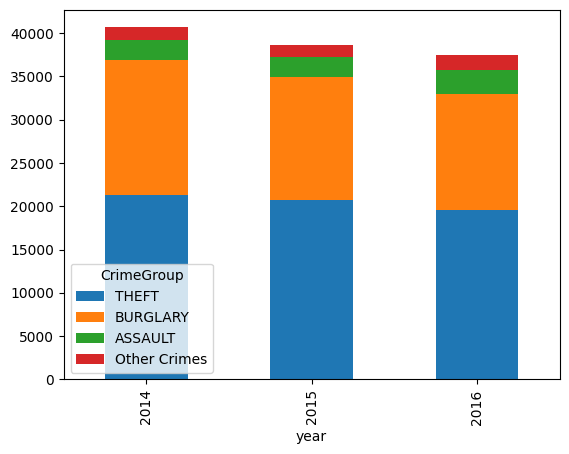

In [51]:
grouped_data = df.groupby(['year', 'CrimeGroup'])['total_crime'].sum().unstack()

column_means = grouped_data.mean()
sorted_columns = column_means.sort_values().index.tolist()
sorted_columns.reverse()

grouped_data = grouped_data[sorted_columns]

grouped_data.plot(kind='bar', stacked=True)

In [ ]:
grouped_data=df.groupby(['year', 'CrimeGroup'])['total_crime'].sum()
